# How Jupyter Notebooks Will Improve Your Computational Life
The bioinformatics community offers a wealth of tools, each honed to perform a specific function. Performing complex tasks will invariably involve passing your data from one of these tools to another - along with suitable parameters - and writing some scripts to connect the pieces. To record this sequence of steps and describe the results, a log or README is usually written. This certainly gets the job done, but I argue there is a better way to create and record workflows involving a mixture of command line tools, scripting languages, and written narrative: Jupyter Notebook. The Jupyter Notebook is a browser-based command shell for interactive computing in several languages: [Python, bash, R, Julya, Haskell, Ruby, and more](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages). To provide a feel for what jupyter notebook can do I'll first present an overview of the user interface. The second part of this blog post will discuss use cases.

# Overview
Once you've got jupter notebook installed ([instructions here](http://jupyter.readthedocs.org/en/latest/install.html) or try it out in your browser without installing anything [here](https://try.jupyter.org/)) you can start a notebook server from the terminal with `$ jupyter notebook`. With a new notebook opened, you'll see an empty cell much like this:

### Cells
The cell (the box with `In [ ]`) at the top of the page is the place to provide some sort of input:
* code
* terminal commands
* markdown text
* mathematical expressions
* html

Pressing shift-enter will compute the input will and return results in an output cell as shown below:

In [1]:
[i**2 for i in xrange(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [2]:
def F(n):
    if n in [0, 1]: return n
    else: return F(n-1)+F(n-2)

In [3]:
F(0), F(1), F(2), F(3), F(4)

(0, 1, 1, 2, 3)

In [4]:
for i in xrange(10):
    print i, F(i)

0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


A useful aspect of this input/output configuration is that after saving, closing and reopening the notebook, all of your work will be reproduced immediately without the need to recompute anything again. In addition, with the rich text formatting (markdown, latex math), you are able to discuss code, output and plots alike:

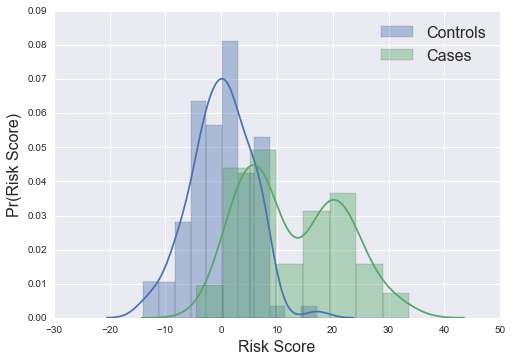

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

controls = np.random.randn(100)*5
cases    = np.hstack((np.random.randn(100)*3 + 5,
                      np.random.randn(100)*5 + 20))

sns.distplot(controls, label="Controls")
sns.distplot(cases, label="Cases")
plt.legend(fontsize=16)
plt.ylabel('Pr(Risk Score)', fontsize=16)
plt.xlabel('Risk Score', fontsize=16);

The controls are modeled nicely by $\mathcal{N}(\mu=5, \sigma^2=0)$, while the cases appear to be a mixture of normals which may be an artefact of some batch effect. **Cases requires more QC.**

### Terminal commands
If you are using the Python kernel, Jupyter will interpret any cells that start with `!` as terminal commands and `%%bash` as bash commands. This enables you to quickly change directories, list directory contents, do some awk, submit jobs and check on job status all from one notebook (and record your activity too):

In [12]:
!ls -lt ../test

total 0
drwxr-xr-x  2 dr9  1159  68 29 Feb 13:22 test2
-rw-r--r--  1 dr9  1159   0 29 Feb 13:19 1
-rw-r--r--  1 dr9  1159   0 29 Feb 13:19 2
-rw-r--r--  1 dr9  1159   0 29 Feb 13:19 3


In [13]:
%%bash

for i in $( ls ../test ); do
    echo item $i
done

item 1
item 2
item 3
item test2


In [ ]:
%%bash

bsub \
-e shapeit.e \
-o shapeit.o \
-n 2 \
-M4000 \
-R"select[mem>4000] rusage[mem=4000] span[hosts=1]" \
./shapeit.sh

Note that this doesn't require a kernel change, other cells will still be interpreted as Python.

### Multiple programming language support
You'll notice that at the top of the page is the word Python. This indicates which kernel is being used. You can change this at any point Kernel > Change kernel (to install more kernels, following instructions [here](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)). This ability enables you in one notebook to:

* prepare some data with Python
* run command line tools
* change kernel
* analyze and plot the output with R

### Export and share
As well as the standard `ipynb` file type, a notebook can be exported in html, pdf and markdown. These exports make it very convenient to share all computationl aspects of some analysis with collaborators. If your analysis can be in the pubic domain, you can push your code to github repository where it can be hosted and rendered for free.


### Magic, Autcomoplete and Help
To draw this feature showcase to a close it is worth mentioning the following utilities:
#### Autocompletion
Pressing `<tab>` after typing a few characters will present:
* available variables that match your characters
* a list of modules/functions for a package

#### Magic
[There are several](http://ipython.readthedocs.org/en/stable/interactive/magics.html) built-in Jupyter functions called magic commands, all preceded by `%%`. Particularly useful are:

##### `%%perl`
Executes the input cell contents as a perl subprocess, without needing to change kernel.

In [14]:
%%perl

@bases = ("A", "C", "G", "T");
print @bases

ACGT

##### `%%who_ls`
Lists all interactive variables entered so far.

In [17]:
a,b,c = (1,2,3)

In [18]:
%who_ls

['F', 'a', 'b', 'c', 'cases', 'controls', 'i', 'np', 'plt', 'sns']

##### `%%timeit`
Times function execution, useful when optmizing code to be as quick as possible.

In [19]:
A = range(100)
B = range(100, 200)

def dot(A,B):
    return sum([a*b for a,b in zip(A,B)])

In [20]:
%timeit dot(A,B)

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 16.3 µs per loop


In [21]:
import numpy as np
A, B = np.array(A), np.array(B)

def np_dot(A, B):
    return np.dot(A,B)

In [22]:
%timeit np_dot(A,B)

The slowest run took 71.07 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 1.69 µs per loop


#### Help
A time saving feature is immediate access to the help or docstring. Typing a question mark after any object, function or method will return the docstring within the browser.

# Use Cases

### Personal log
The features described above make a compelling case for a one-stop-shop solution to recording your daily computational work. Often scripts, results, logs are in seperate files. Jupyter, on the other hand, provides a unifying platform to view all of these.

### Education and training
Being able to present a mix of narrative, code, and output, a notebook is a great vehicle for teaching. If the learner has the `.ipynb` file, it is a great way to modify and play around with the code and observe immediately observe the effects. There are some great examples of using a notebook as an educational medium:

* [Probabilistic Programming & Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)
* [An Introduction to Applied Bioinformatics](http://readiab.org/)
* [Scientific Computing with Python](http://nbviewer.jupyter.org/url/atwallab.cshl.edu/teaching/QBbootcamp3.ipynb)

An extensive gallery of interesting IPython Notebooks has been collected and is available [here](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

Learning material is rarely static and is constantly being evolved. Adding a notebook to a publicly available github repository would be an excellent way to iteratively improve material, as is done for several of the notebooks listed above.

### Reproducibility
Providing a self contained notebook that lists all steps performed in an analsysis is a great way to supplement papers. [Several papers](
https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#reproducible-academic-publications) currently have notebooks included in the supplementary material. For example, [The probability of improvement in Fisher’s geometric model: A probabilistic approach by Yoav Ram and Lilach Hadany](http://nbviewer.jupyter.org/url/www.sciencedirect.com/science/MiamiMultiMediaURL/1-s2.0-S0040580914000811/1-s2.0-S0040580914000811-mmc1.txt/272364/FULL/S0040580914000811/471cf02085a52c248dc76ae65ad4409d/mmc1.txt) has provided an excellent publicly available notebook which details the steps used to generate a figure from their article.


# Conclusion
Jupyter notebooks can serve to record daily computational work, provide an excellent teaching platform, and capture and share computational steps in supplementary material. As most of science is becoming increasingly computational, tools such as Jupyter Notebook will help to record and share the many computations a scientist will perform on a daily basis.


# Resources and Further Reading
* An easy way to install Jupyter is using [miniconda](http://conda.pydata.org/miniconda.html)
* An essay by Fernando Perez and Brian E. Granger about the Jupyter and Collaborative Data Science [Project Jupyter: Computational Narratives as the Engine of Collaborative Data Science](http://blog.jupyter.org/2015/07/07/project-jupyter-computational-narratives-as-the-engine-of-collaborative-data-science/)
* [Jupyter's blog](https://blog.jupyter.org/)